In [1]:

from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.exposure import histogram
import os
import math


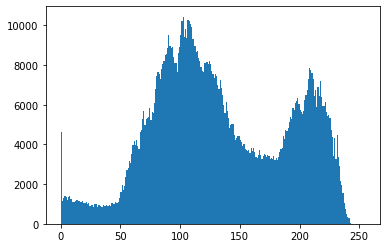

In [14]:


image1 = cv2.imread("01_black.jpg") #Открываем изображение. 
image2 = cv2.imread("02_black.jpg") #Открываем изображение.
plt.hist(image2.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.savefig('l3_gist_2.jpg')

plt.show()

In [3]:
# size1 = image1.shape
# size2 = image2.shape
# print(size1)
# print(size2)

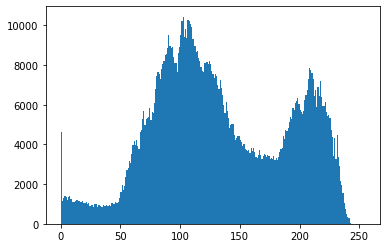

In [18]:
#нормализация гистограмм

image1 = cv2.imread("01_black.jpg") #Открываем изображение. 
image2 = cv2.imread("02_black.jpg") #Открываем изображение.

image1N = image1.copy()
image2N = image2.copy()

image1N = cv2.normalize(image1N, None, 0, 255, norm_type=cv2.NORM_MINMAX)
image2N = cv2.normalize(image2N, None, 0, 255, norm_type=cv2.NORM_MINMAX)


plt.hist(image2N.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.savefig('l3_gist_norm_2.jpg')
cv2.imwrite('image_norm_2.jpg',image2N)


plt.show()

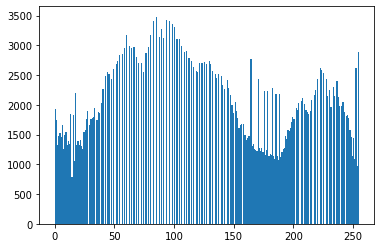

In [20]:
#Эквализация гистограмм


image1 = cv2.imread("01_black.jpg") #Открываем изображение. 
image2 = cv2.imread("02_black.jpg") #Открываем изображение.
image1Q = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2Q = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image1Q = cv2.equalizeHist(image1Q)
image2Q = cv2.equalizeHist(image2Q)


plt.hist(image2Q.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.savefig('l3_gist_ekv_2.jpg')
cv2.imwrite('image_ekv_2.jpg',image2Q)

plt.show()

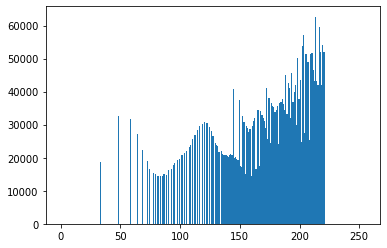

In [23]:

image1 = cv2.imread("01_black.jpg") #Открываем изображение. 
image2 = cv2.imread("02_black.jpg") #Открываем изображение.
def find_closest(A, target):
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A) - 1)
    left = A[idx - 1]
    right = A[idx]
    idx -= target - left < right - target
    return A[idx]
def function_prived(image, x, y):
    # функция распределения гистограммы
    hist, hist_centers = histogram(image)
    img_accum = []
    func_accum = []    
    dict_img = {}
    dict_func = {}
    dict_res = {}
    s = 0
    for i in range(len(hist)):
        s += hist[i]
        img_accum.append(s)
    for key, val in zip(hist_centers, img_accum):
        dict_img[key] = val
    s = 0
    for i in range(len(y)):
        s += y[i]
        func_accum.append(s)
    for key, val in zip(x, func_accum):
        dict_func[key] = val
    A = np.array(func_accum)
    target = list(img_accum)
    new_match = find_closest(A, target)
    tmp = []
    for i in find_closest(A, target):
        for key, value in dict_func.items():  
            if value == i:
                tmp.append(key)
    for key, value in zip(hist_centers, tmp):
        dict_res[key] = value
    shape_img = image.shape   
    image_copy = image.copy()
    image_copy = image_copy.ravel()
    for i in range(len(image_copy)):
        image_copy[i] = dict_res[image_copy[i]]
    image_copy = image_copy.reshape(shape_img)   
    return image_copy   

image_1_priv = function_prived(image1, x, y)
image_2_priv = function_prived(image2, x, y)
plt.hist(image_1_priv.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.savefig('l3_gist_priv_1.jpg')
cv2.imwrite('image_priv_1.jpg',image_1_priv)

# 
plt.show()

